In [1]:
from datacommon.dbconnectors import PrestoDb
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from jplotlib import jbar, jhist

db = PrestoDb(host='emr-prd-queries.jampp.com', username='jmermet', port=8889, catalog='hive', database='aleph')

# Histograma exacto por día

100% (100 of 100) |######################| Elapsed Time: 0:00:28 Time:  0:00:28


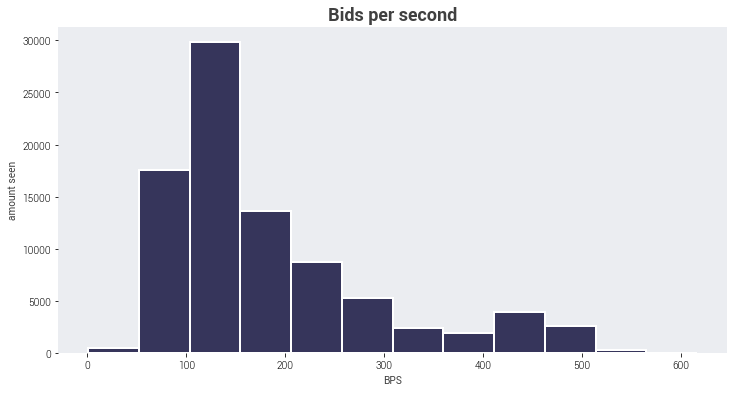

In [9]:
def query_dia(year,month,day):
    return """
    select cant from (
        select date_trunc('second', from_iso8601_timestamp(created)) as ts, count(*) as cant 
        from bids_daily 
        where day = {} and region = 'ap-southeast-1' 
        group by 1)
    """.format("'{:04d}{:02d}{:02d}'".format(year,month,day))

df = db.to_frame(query_dia(2018,12,10), show_progress=True)
hist = jhist(df.cant, bins=12, xlabel="BPS", ylabel="amount seen")
hist.set_title("Bids per second")

# Histograma aproximado con Presto

100% (100 of 100) |######################| Elapsed Time: 0:00:14 Time:  0:00:14


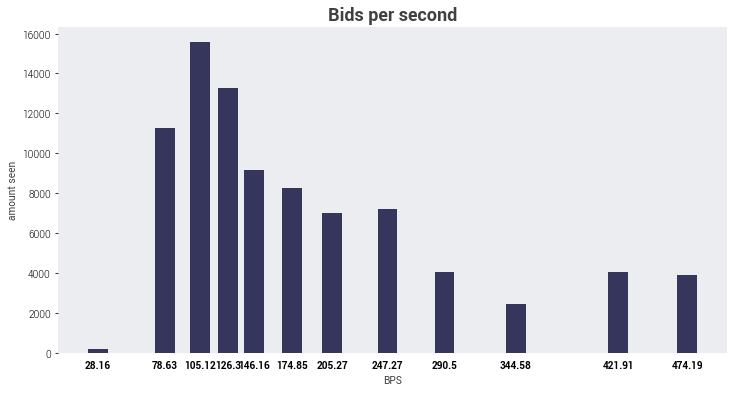

In [7]:
def query_dia(year,month,day):
    return """
     select numeric_histogram(12, cant) as hist, max(cant) as max, min(cant) as min, count(cant) as total 
     from (  
             select date_trunc('second', from_iso8601_timestamp(created)), count(*) as cant 
             from bids_daily 
             where day = {} and region = 'ap-southeast-1' 
             group by 1)
    """.format("'{:04d}{:02d}{:02d}'".format(year,month,day))

df = db.to_frame(query_dia(2018,12,10), show_progress=True)

hist, max_, min_, cant = df.iloc[0].values
hist = sorted([(round(float(k), 2),int(v)) for k,v in hist.items()])

xvals = [x[0] for x in hist]
yvals = [x[1] for x in hist]
bar = jbar(yvals, xvals, width=15, labels=xvals, xlabel="BPS", ylabel="amount seen")
bar.set_title("Bids per second")